<a href="https://colab.research.google.com/github/hospino/Cursos-Platzi/blob/main/carga_registroProductor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import pandas as pd

# Define la ruta del archivo
# Asegúrate de que esta ruta sea exactamente donde guardaste el archivo.
file_path = '/content/drive/MyDrive/REGISTRO_PRODUCTOR.csv'

# Cargar el archivo con los parámetros corregidos:
# encoding='latin-1' para solucionar el UnicodeDecodeError.
# sep=';' para solucionar el ParserError.
try:
    df = pd.read_csv(file_path, encoding='latin-1', sep=';')
    print("¡El archivo se cargó exitosamente!")
    print(f"Número de filas cargadas: {len(df)}")
    print("\nPrimeras 5 filas del DataFrame:")
    print(df.head())
except Exception as e:
    print(f"¡Error crítico al cargar el archivo! Detalle: {e}")

¡El archivo se cargó exitosamente!
Número de filas cargadas: 15175

Primeras 5 filas del DataFrame:
   Unnamed: 0      cedula            nombres         apellidos      sexos  \
0         NaN   V-7782102       Lexy Antonio  Montero Guerrero  Masculino   
1         NaN  V-18056543              WALDO            GARCIA  Masculino   
2         NaN   V-9200278  Naudys Wenceslado   Orellana Molina  Masculino   
3         NaN   V-9200278  Naudys Wenceslado   Orellana Molina  Masculino   
4         NaN  V-17793923      Yngris Karina    Ledezma Prieto   Femenino   

                        correo estado_habitacion municipio_habitacion  \
0        lexymontero@gmail.com            Mérida      Alberto Adriani   
1     poderyuncion@hotmail.com            Mérida      Alberto Adriani   
2          wence88@hotmail.com            Mérida      Alberto Adriani   
3          wence88@hotmail.com            Mérida      Alberto Adriani   
4  yngris_director@hotmail.com            Mérida      Alberto Adriani   

/tmp/ipython-input-2777234666.py:11: DtypeWarning: Columns (12,24,25,32,33,34,44,51,58,60,67,69,70,71,73,76,80,81,90,94,96,97,101,108,114,115,118,123,124,126,127,129,134,139,140,142,143,145,147,149,150,153,154,159,162,168,170,171,174,175,180,183,184,185) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='latin-1', sep=';')


In [ ]:

# Eliminar la primera columna si está vacía (Unnamed: 0)
# Usamos .iloc para seleccionar la columna por índice (0)
df = df.drop(df.columns[0], axis=1, errors='ignore')

# Eliminar cualquier columna que contenga SOLO valores NaN
# axis=1 trabaja con columnas, how='all' solo elimina si toda la columna es NaN
df = df.dropna(axis=1, how='all')

print(f"El DataFrame final tiene {df.shape[1]} columnas limpias.")
print(df.head())

El DataFrame final tiene 144 columnas limpias.
       cedula            nombres         apellidos      sexos  \
0   V-7782102       Lexy Antonio  Montero Guerrero  Masculino   
1  V-18056543              WALDO            GARCIA  Masculino   
2   V-9200278  Naudys Wenceslado   Orellana Molina  Masculino   
3   V-9200278  Naudys Wenceslado   Orellana Molina  Masculino   
4  V-17793923      Yngris Karina    Ledezma Prieto   Femenino   

                        correo estado_habitacion municipio_habitacion  \
0        lexymontero@gmail.com            Mérida      Alberto Adriani   
1     poderyuncion@hotmail.com            Mérida      Alberto Adriani   
2          wence88@hotmail.com            Mérida      Alberto Adriani   
3          wence88@hotmail.com            Mérida      Alberto Adriani   
4  yngris_director@hotmail.com            Mérida      Alberto Adriani   

    parroquia_habitacion   tipo_produccion nombre_categoria  ... Unnamed: 178  \
0  Presidente Betancourt     Agroindustria

In [ ]:

import pandas as pd

# 1. Identificar columnas que comienzan con 'Unnamed:'
columnas_a_eliminar = [col for col in df.columns if col.startswith('Unnamed:')]

# 2. Eliminar esas columnas del DataFrame
df = df.drop(columns=columnas_a_eliminar, errors='ignore')

print(f"Se eliminaron {len(columnas_a_eliminar)} columnas con el prefijo 'Unnamed:'.")
print(f"El DataFrame final ahora tiene {df.shape[1]} columnas.")
print("\nPrimeras 5 filas del DataFrame final (sin 'Unnamed:'):")
print(df.head())

Se eliminaron 129 columnas con el prefijo 'Unnamed:'.
El DataFrame final ahora tiene 15 columnas.

Primeras 5 filas del DataFrame final (sin 'Unnamed:'):
       cedula            nombres         apellidos      sexos  \
0   V-7782102       Lexy Antonio  Montero Guerrero  Masculino   
1  V-18056543              WALDO            GARCIA  Masculino   
2   V-9200278  Naudys Wenceslado   Orellana Molina  Masculino   
3   V-9200278  Naudys Wenceslado   Orellana Molina  Masculino   
4  V-17793923      Yngris Karina    Ledezma Prieto   Femenino   

                        correo estado_habitacion municipio_habitacion  \
0        lexymontero@gmail.com            Mérida      Alberto Adriani   
1     poderyuncion@hotmail.com            Mérida      Alberto Adriani   
2          wence88@hotmail.com            Mérida      Alberto Adriani   
3          wence88@hotmail.com            Mérida      Alberto Adriani   
4  yngris_director@hotmail.com            Mérida      Alberto Adriani   

    parroquia_ha

In [ ]:

# 1. Limpieza de las columnas de texto (nombres, apellidos, upa, etc.)
columnas_texto = ['nombres', 'apellidos', 'upa']

for col in columnas_texto:
    # Capitaliza la primera letra de cada palabra y elimina espacios extra
    df[col] = df[col].str.title().str.strip()

# 2. Estandarización de columnas categóricas (sexos, tipo_produccion)
columnas_categoricas = ['sexos', 'tipo_produccion', 'parroquia_habitacion', 'nombre_categoria']

for col in columnas_categoricas:
    # Convierte todo a Mayúsculas para evitar inconsistencias
    df[col] = df[col].str.upper().str.strip()

print("Datos de texto estandarizados a formato consistente (Mayúsculas o Capitalizado).")

Datos de texto estandarizados a formato consistente (Mayúsculas o Capitalizado).


In [ ]:

# Rellenar los valores NaN de 'nombre_categoria' con 'NO ESPECIFICADO'
df['nombre_categoria'] = df['nombre_categoria'].fillna('NO ESPECIFICADO')

# 💡 Verificación: Ahora deberíamos ver NO ESPECIFICADO en lugar de NaN
print("\nPrimeras filas después de rellenar NaN:")
print(df[['tipo_produccion', 'nombre_categoria']].head())


Primeras filas después de rellenar NaN:
    tipo_produccion nombre_categoria
0     AGROINDUSTRIA  NO ESPECIFICADO
1            KONUCO        COLECTIVO
2            KONUCO         FAMILIAR
3            KONUCO         FAMILIAR
4  PRODUCCIÓN MIXTA  NO ESPECIFICADO


In [ ]:

# Muestra el conteo de valores no-nulos y el tipo de dato de cada columna
df.info()

# Muestra el resumen estadístico de las columnas numéricas (solo 'extension')
print("\n--- Resumen Estadístico de 'extension' ---")
print(df['extension'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15175 entries, 0 to 15174
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   cedula                15175 non-null  object
 1   nombres               15173 non-null  object
 2   apellidos             15174 non-null  object
 3   sexos                 15174 non-null  object
 4   correo                15175 non-null  object
 5   estado_habitacion     15175 non-null  object
 6   municipio_habitacion  15175 non-null  object
 7   parroquia_habitacion  15175 non-null  object
 8   tipo_produccion       15175 non-null  object
 9   nombre_categoria      15175 non-null  object
 10  upa                   15174 non-null  object
 11  extension             15174 non-null  object
 12  entidad               15175 non-null  object
 13  nombre_municipio      15175 non-null  object
 14  nombre_parroquia      15175 non-null  object
dtypes: object(15)
memory usage: 1.7+ MB


In [ ]:

# Conteo de productores por Municipio
print("\n--- Top 5 Municipios con más Productores ---")
print(df['nombre_municipio'].value_counts().head())

# Conteo de productores por Parroquia (dentro de los datos que tienes)
print("\n--- Top 5 Parroquias con más Productores ---")
print(df['nombre_parroquia'].value_counts().head())


--- Top 5 Municipios con más Productores ---
nombre_municipio
Alberto Adriani     1816
Rangel              1746
Rivas Dávila        1621
Sucre               1005
Arzobispo Chacón     920
Name: count, dtype: int64

--- Top 5 Parroquias con más Productores ---
nombre_parroquia
Bailadores               1400
Pueblo Llano              709
Mucuchíes                 644
Presidente Betancourt     618
Timotes                   561
Name: count, dtype: int64


In [ ]:

# Conteo de productores por Sexo
print("\n--- Distribución por Género ---")
distribucion_sexo = df['sexos'].value_counts(normalize=True) * 100
print(distribucion_sexo)


--- Distribución por Género ---
sexos
MASCULINO    74.476078
FEMENINO     25.523922
Name: proportion, dtype: float64


In [ ]:

# Conteo de los Tipos de Producción más comunes
print("\n--- Tipos de Producción Más Comunes ---")
print(df['tipo_produccion'].value_counts().head(5))

# Conteo de las Categorías (incluyendo el valor 'NO ESPECIFICADO' que añadimos)
print("\n--- Distribución de Categorías ---")
print(df['nombre_categoria'].value_counts())


--- Tipos de Producción Más Comunes ---
tipo_produccion
KONUCO                 11991
PRODUCCIÓN PRIMARIA     1584
PRODUCCIÓN MIXTA        1418
AGROINDUSTRIA            179
PULIDO MÉNDEZ              1
Name: count, dtype: int64

--- Distribución de Categorías ---
nombre_categoria
INDIVIDUAL         7715
FAMILIAR           3877
NO ESPECIFICADO    1597
VEGETAL            1287
COLECTIVO           399
PECUARIO            297
KONUCO                3
Name: count, dtype: int64


In [ ]:

# Contar el número de cédulas únicas
cedulas_unicas = df['cedula'].nunique()

print(f"\n--- Verificación de Registros Duplicados ---")
print(f"Número total de filas: {len(df)}")
print(f"Número de cédulas únicas: {cedulas_unicas}")
print(f"Registros duplicados por cédula: {len(df) - cedulas_unicas}")


--- Verificación de Registros Duplicados ---
Número total de filas: 15175
Número de cédulas únicas: 13589
Registros duplicados por cédula: 1586


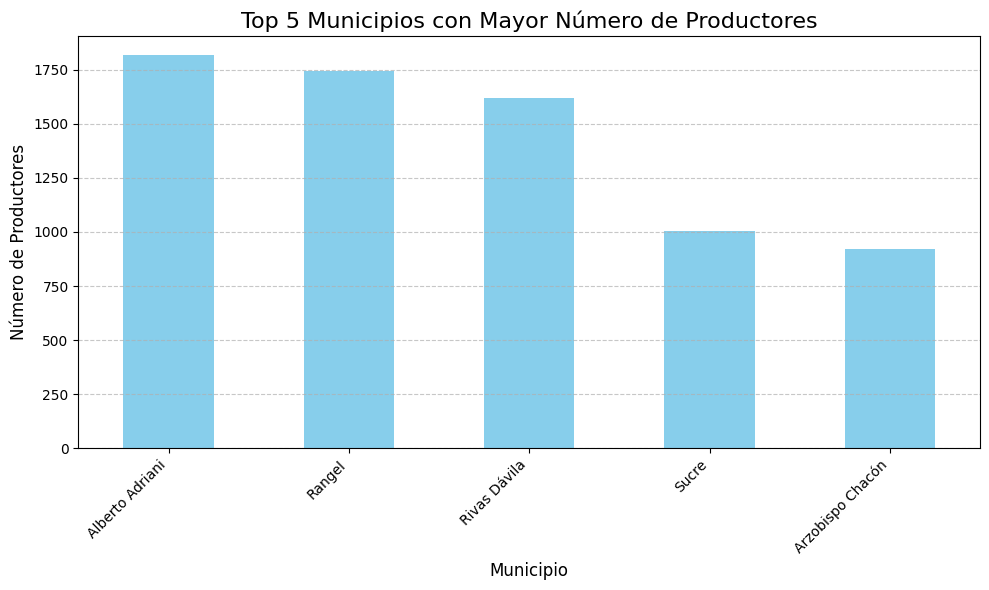

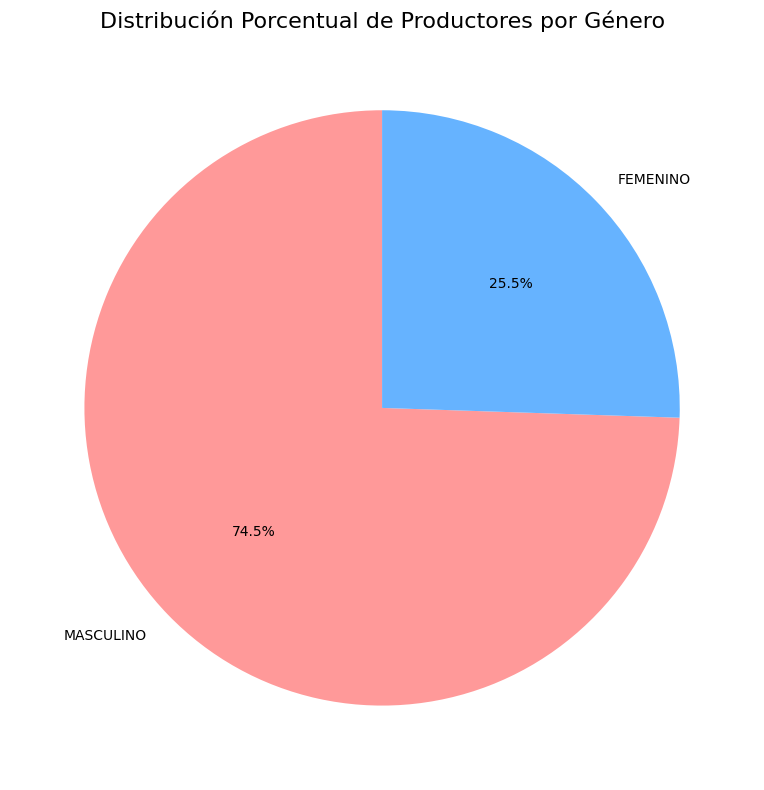

TypeError: '<' not supported between instances of 'str' and 'int'

<Figure size 1000x600 with 0 Axes>

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd

# Aseguramos que los gráficos se muestren inline en Colab
%matplotlib inline

# --- 1. Top 5 Municipios con más Productores (Gráfico de Barras) ---
plt.figure(figsize=(10, 6))
top_municipios = df['nombre_municipio'].value_counts().head(5)
top_municipios.plot(kind='bar', color='skyblue')

plt.title('Top 5 Municipios con Mayor Número de Productores', fontsize=16)
plt.xlabel('Municipio', fontsize=12)
plt.ylabel('Número de Productores', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rota los nombres para mejor lectura
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- 2. Distribución de Productores por Género (Gráfico Circular) ---
plt.figure(figsize=(8, 8))
distribucion_sexo = df['sexos'].value_counts()
distribucion_sexo.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])

plt.title('Distribución Porcentual de Productores por Género', fontsize=16)
plt.ylabel('') # Oculta la etiqueta 'sexos' del eje y
plt.tight_layout()
plt.show()

# --- 3. Distribución de la Extensión de las UPAs (Histograma) ---
plt.figure(figsize=(10, 6))

# Filtramos valores extremos para hacer el histograma más legible (ej. < 100 hectáreas)
df_filtrado = df[df['extension'] < 100]

# El histograma muestra la frecuencia de las extensiones
plt.hist(df_filtrado['extension'], bins=20, color='lightgreen', edgecolor='black')

plt.title('Distribución de la Extensión de Parcelas (Extensiones < 100 ha)', fontsize=16)
plt.xlabel('Extensión (Hectáreas)', fontsize=12)
plt.ylabel('Frecuencia (Número de UPAs)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:

# FIX: Se convierte la columna 'extension' a tipo numérico.
# 'errors='coerce'' reemplaza cualquier texto o valor inválido con NaN.
df['extension'] = pd.to_numeric(df['extension'], errors='coerce')

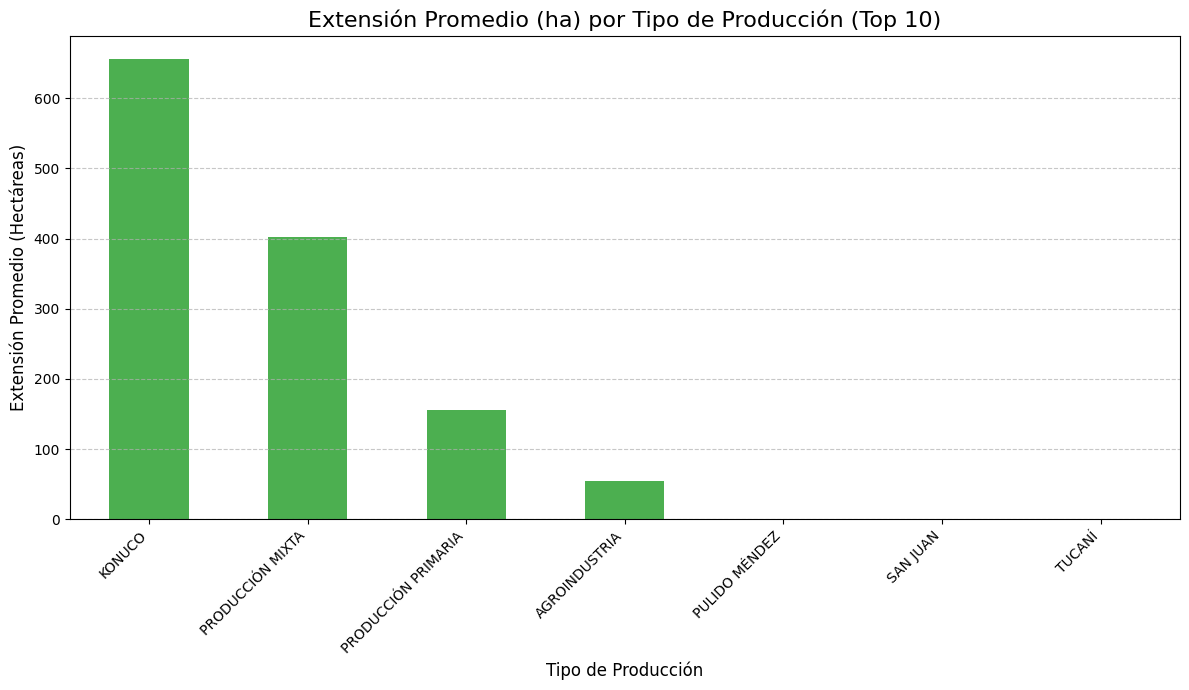

In [ ]:

# Aseguramos que la columna 'extension' es numérica (ya corregido previamente, pero es buena práctica)
df['extension'] = pd.to_numeric(df['extension'], errors='coerce')

# Calcular la extensión promedio por Tipo de Producción
extension_promedio = df.groupby('tipo_produccion')['extension'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))
extension_promedio.plot(kind='bar', color='#4CAF50')

plt.title('Extensión Promedio (ha) por Tipo de Producción (Top 10)', fontsize=16)
plt.xlabel('Tipo de Producción', fontsize=12)
plt.ylabel('Extensión Promedio (Hectáreas)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

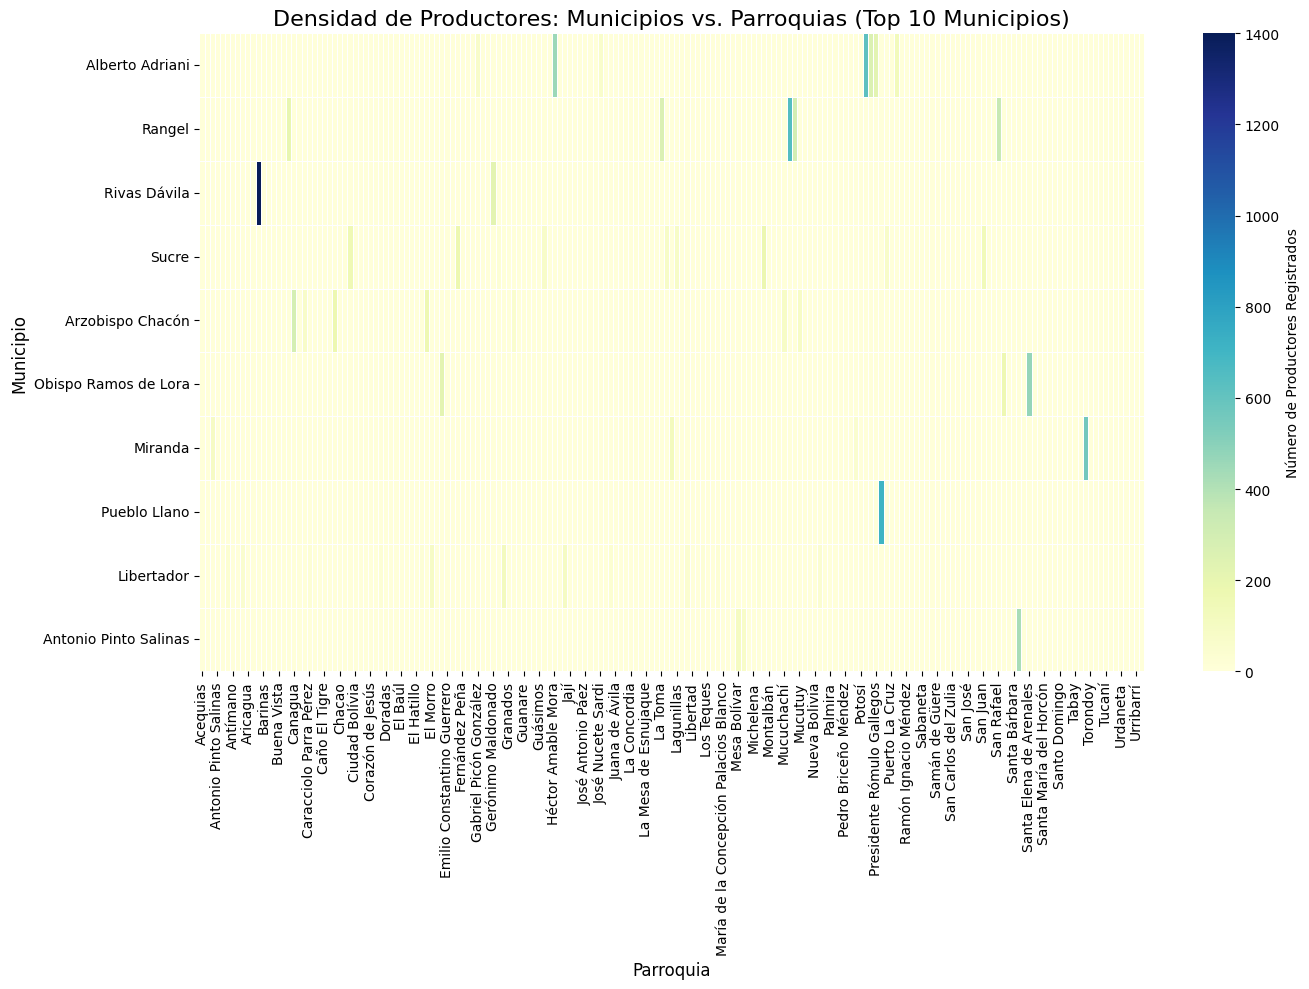

In [ ]:

import seaborn as sns # Usaremos seaborn para el mapa de calor

# Crear la tabla cruzada (conteo de registros por Municipio y Parroquia)
conteo_geografico = pd.crosstab(
    df['nombre_municipio'],
    df['nombre_parroquia']
)

# Filtramos los municipios más relevantes para que el mapa no sea demasiado grande
municipios_relevantes = df['nombre_municipio'].value_counts().head(10).index
conteo_filtrado = conteo_geografico.loc[municipios_relevantes].fillna(0) # Rellenamos NaN con 0

plt.figure(figsize=(14, 10))
# Generar el mapa de calor
sns.heatmap(
    conteo_filtrado,
    annot=False, # Ponemos False para evitar saturar si hay muchas parroquias
    cmap='YlGnBu',
    fmt='g',
    linewidths=.5,
    cbar_kws={'label': 'Número de Productores Registrados'}
)

plt.title('Densidad de Productores: Municipios vs. Parroquias (Top 10 Municipios)', fontsize=16)
plt.xlabel('Parroquia', fontsize=12)
plt.ylabel('Municipio', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

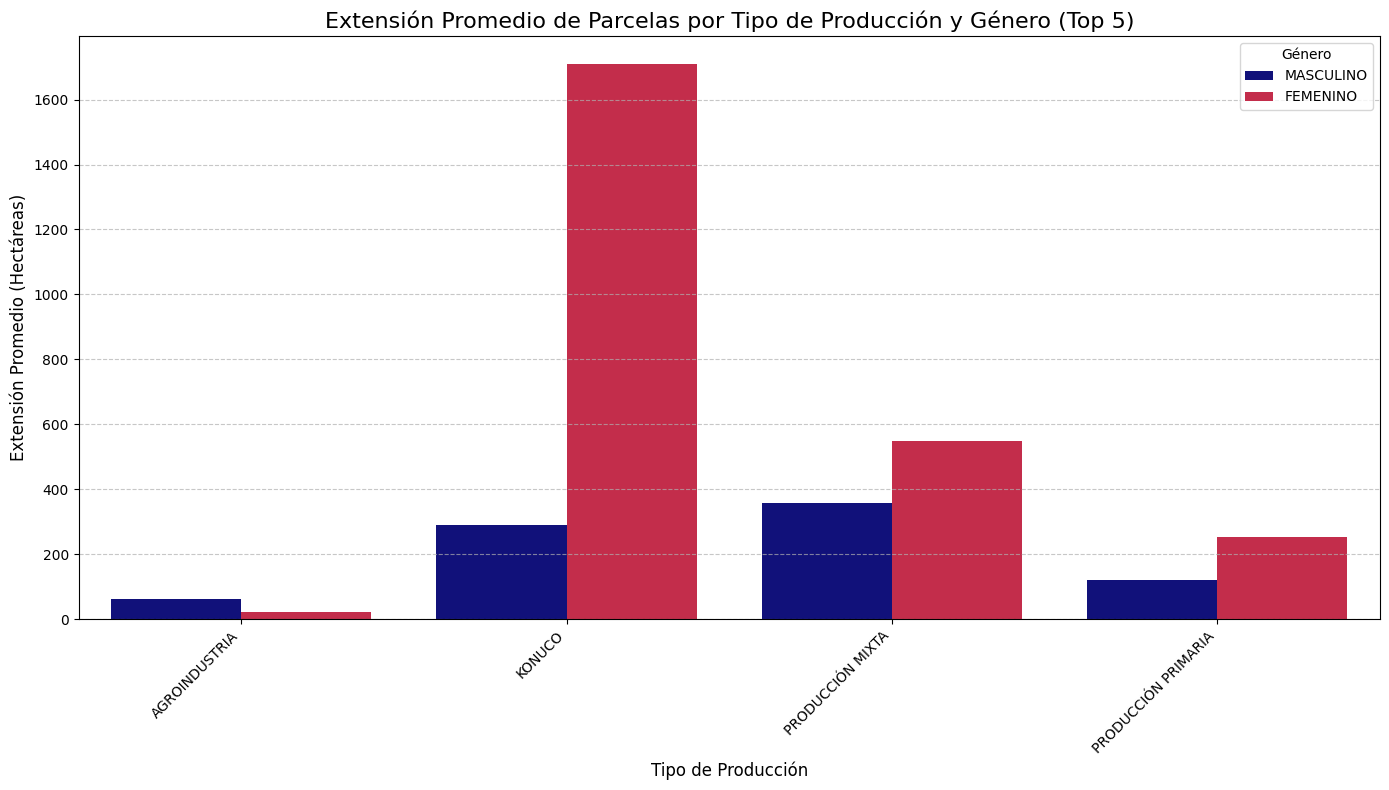

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Identificar los 5 tipos de producción más comunes
top_5_produccion = df['tipo_produccion'].value_counts().head(5).index

# 2. Filtrar el DataFrame para incluir solo el Top 5 de producción y género válidos
df_segmentado = df[
    (df['tipo_produccion'].isin(top_5_produccion)) &
    (df['sexos'].isin(['MASCULINO', 'FEMENINO']))
].copy()

# 3. Asegurar que la extensión sea numérica (por si el entorno de Colab se reinició)
df_segmentado['extension'] = pd.to_numeric(df_segmentado['extension'], errors='coerce')

# 4. Crear el gráfico de barras agrupadas
plt.figure(figsize=(14, 8))
sns.barplot(
    data=df_segmentado,
    x='tipo_produccion',
    y='extension',
    hue='sexos',
    errorbar=None,  # Esto asegura que se grafique el valor promedio sin barras de error
    palette={'MASCULINO': 'darkblue', 'FEMENINO': 'crimson'}
)

plt.title('Extensión Promedio de Parcelas por Tipo de Producción y Género (Top 5)', fontsize=16)
plt.xlabel('Tipo de Producción', fontsize=12)
plt.ylabel('Extensión Promedio (Hectáreas)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Género')
plt.tight_layout()
plt.show()